# Análise dos dados de queimadas no estados brasileiros e AMZ


O objetivo deste trabalho consiste em estimar a quantidade de focos de incêndio nos estados brasileiros em anos futuros, considerando os dados dos anos atual e anteriores


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from enum import Enum


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [35]:
class DataSourceEnum(Enum):
    GOOGLE_DRIVE = 'google drive'
    
class DataSourceNotFoundException(Exception):
    def __init__(self):
        super().__init__("Fonte para buscar dados é inválida.")
    
    
    
    
def fetchCSV(url: str, source: DataSourceEnum, encoding: str = 'UTF-8'):
    if source == DataSourceEnum.GOOGLE_DRIVE:
        baseUrl = "https://drive.google.com/uc?id="
        csvData = f"{baseUrl}{url.split('/')[-2]}"
    else:
        raise DataSourceNotFoundException()
        
    if encoding:
        return pd.read_csv(csvData,encoding=encoding)
    return pd.read_csv(csvData)


def cleanData(dataframe, inplace = False):
    return dataframe.dropna(inplace=inplace).drop_duplicates(inplace=inplace)        

class DateMonthEnum(Enum):
    JAN = "Janeiro"
    FEB = "Fevereiro"
    MAR = "Março"
    APR = "Abril"
    MAY = "Maio"
    JUN = "Junho"
    JUL = "Julho"
    AUG = "Agosto"
    SEP = "Setembro"
    OCT = "Outubro"
    NOV = "Novembro"
    DEC = "Dezembro"

    def getMonths():
        return DateMonthEnum.__members__.values()

numericDateMonth = {
    DateMonthEnum.JAN: 1,
    DateMonthEnum.FEB: 2,
    DateMonthEnum.MAR: 3,
    DateMonthEnum.APR: 4,
    DateMonthEnum.MAY: 5,
    DateMonthEnum.JUN: 6,
    DateMonthEnum.JUL: 7,
    DateMonthEnum.AUG: 8,
    DateMonthEnum.SEP: 9,
    DateMonthEnum.OCT: 10,
    DateMonthEnum.NOV: 11,
    DateMonthEnum.DEC: 12,
}
    
def altermonth(dataframe):
    for month in DateMonthEnum.getMonths():
        dataframe.month[dataframe.month==month.value] = numericDateMonth[month]
        
    return dataframe

   
def mergeDataBases(db1, db2):
    db3 = pd.concat([db1,db2])
    return db3

def selection_variables_train_test(x,y):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    return xTrain, xTest, yTrain, yTest


def model_regression_linear(xTrain,yTrain):
    #regr_linear = LinearRegression().fit(xTrain, yTrain)
    regr_linear = RandomForestRegressor().fit(xTrain,yTrain)
    return regr_linear
   
def fit_model(classifier,xTrain,yTrain):
    classifier.fit(xTrain,yTrain)
    return classifier


def plot_graph(dataframe,Titulo:"Gráfico"):
    
    return dataframe.plot(figsize=(10, 6)).set_title(Titulo, fontsize = 15)

def create_dataframe(xTest,yPred,prediction_relative_error,yTest):
    
    dataframe = xTest.copy()
    dataframe['prediction'] = yPred
    dataframe['relative_error'] = prediction_relative_error
    dataframe['Focos de incêndio'] = yTest
    
    return dataframe


def cross_validation(x_axis,y_axis):
  kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()
  NeuralRegression = MLPRegressor()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)
  NeuralRegression_result = cross_val_score(NeuralRegression, x, y, cv = kfold)

 
  print("Linear Regression Média (R^2): {0}\nElastic Net Média (R^2): {1}\nRidge Média (R^2): {2}\nLasso Média (R^2): {3}\nNeural (R^2): {4}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean(),NeuralRegression_result.mean()))
 








In [3]:
#Dados queimadas - Amazônia Legal
forestFiresAM = fetchCSV(url='https://drive.google.com/file/d/1vRVra-yLlZxknweY-6YIQQJjWCqK75mT/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE)
forestFiresAM = cleanData(forestFiresAM)

#Dados queimadas - Brasil
forestFires = fetchCSV(url='https://drive.google.com/file/d/1VdFxMxEWzUuqYLTfv2grmFD2tDRdOez-/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
forestFires = cleanData(forestFires)
forestFires

#Dados Desmatamento - Amazônia Legal
deforestation = fetchCSV(url='https://drive.google.com/file/d/1gF9JQPHV7dbviqLl8Z-MY_C8iyF1OREd/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
deforestation = cleanData(deforestation)




In [4]:
#Análise dos dataframes

In [5]:
deforestation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ï»¿Ano/Estados  16 non-null     int64
 1   AC              16 non-null     int64
 2   AM              16 non-null     int64
 3   AP              16 non-null     int64
 4   MA              16 non-null     int64
 5   MT              16 non-null     int64
 6   PA              16 non-null     int64
 7   RO              16 non-null     int64
 8   RR              16 non-null     int64
 9   TO              16 non-null     int64
 10  AMZ LEGAL       16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [6]:
forestFires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6422 non-null   int64  
 1   state   6422 non-null   object 
 2   month   6422 non-null   object 
 3   number  6422 non-null   float64
 4   date    6422 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 301.0+ KB


In [7]:
forestFiresAM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 115.1+ KB


In [8]:
#Conhecer variáveis disponíveis 
deforestation.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [9]:
forestFires.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [10]:
forestFiresAM.columns

Index(['year', 'month', 'state', 'latitude', 'longitude', 'firespots'], dtype='object')

In [11]:
deforestation.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [12]:
forestFires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [13]:
forestFiresAM.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [14]:
#Ajustar meses para Dataframe com todos os estados de queimada
forestFires = altermonth(forestFires)
#forestFires = alterstate(forestFires)
forestFires

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,12,128.0,2012-01-01
6450,2013,Tocantins,12,85.0,2013-01-01
6451,2014,Tocantins,12,223.0,2014-01-01
6452,2015,Tocantins,12,373.0,2015-01-01


In [15]:
forestFiresAM = forestFiresAM[['year','month','state','firespots']]
forestFiresAM = forestFiresAM.groupby(['year','state','month']).sum().reset_index()

In [16]:
### Somente Estados que não são da Amazônia Legal (para não ter duplicidade)
forestFires = forestFires.query("not(state == 'Acre') and not(state == 'Amapa') and not(state == 'Amazonas') and not(state == 'Mato Grosso') and not(state == 'Para') and not(state == 'Rondonia') and not(state == 'Roraima') and not(state == 'Tocantins') and not(state == 'Pará')and not(state == 'Maranhao')")

In [17]:
#Ajustar o nome para juntar dataframes
forestFiresAM = forestFiresAM.rename(columns={'firespots': 'number'})

In [18]:
#juntar dataframes
generalforestfires = mergeDataBases(forestFires, forestFiresAM)

In [19]:
generalforestfires 

,year,state,month,number,date
239,1998,Alagoas,1,0.0,1998-01-01
240,1999,Alagoas,1,58.0,1999-01-01
241,2000,Alagoas,1,11.0,2000-01-01
242,2001,Alagoas,1,5.0,2001-01-01
243,2002,Alagoas,1,12.0,2002-01-01
...,...,...,...,...,...
2099,2019,TOCANTINS,8,62.0,NaN
2100,2019,TOCANTINS,9,40.0,NaN
2101,2019,TOCANTINS,10,43.0,NaN
2102,2019,TOCANTINS,11,44.0,NaN


In [20]:
#Ajustar meses 
#generalforestfires = altermonth(generalforestfires)
#generalforestfires


In [ ]:
#Devido ao fato do dataframe de AM ter registros somente superior a 2019, equiparar os dataframes
generalforestfires = generalforestfires.loc[generalforestfires['year']>=2000]

In [21]:
### Análise dos dados
generalforestfires['number'].describe()

count     6141.000000
mean       465.697223
std       1810.291448
min          0.000000
25%          6.000000
50%         40.000000
75%        189.000000
max      37926.000000
Name: number, dtype: float64

In [22]:
print('Max number of registered fires in a month: ',generalforestfires['number'].max())
print('State: ',generalforestfires[generalforestfires['number'] ==  generalforestfires['number'].max()]['state'].iloc[0])
print('Month: ',generalforestfires[generalforestfires['number'] ==  forestFires['number'].max()]['month'].iloc[0])
print('Year: ',generalforestfires[generalforestfires['number'] ==  generalforestfires['number'].max()]['year'].iloc[0])

Max number of registered fires in a month:  37926.0
State:  PARA
Month:  8
Year:  2002


In [23]:
print('Min number of registered fires in a month: ',generalforestfires['number'].min())
print('State: ',generalforestfires[generalforestfires['number'] ==  generalforestfires['number'].min()]['state'].iloc[0])
print('Month: ',generalforestfires[generalforestfires['number'] ==  generalforestfires['number'].min()]['month'].iloc[0])
print('Year: ',generalforestfires[generalforestfires['number'] ==  generalforestfires['number'].min()]['year'].iloc[0])

Min number of registered fires in a month:  0.0
State:  Alagoas
Month:  1
Year:  1998


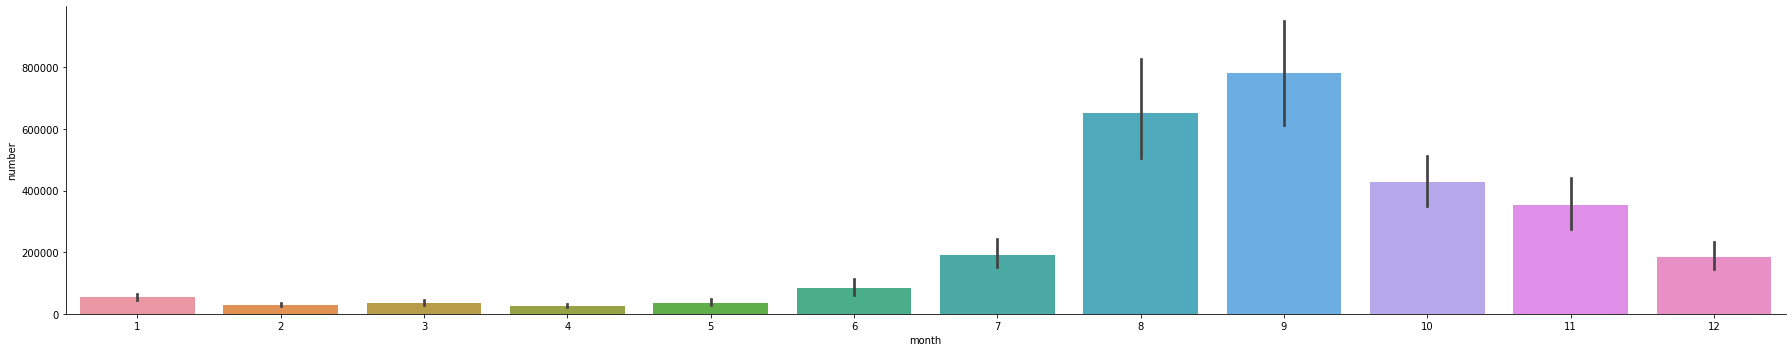

In [24]:
sns.catplot(x='month', y='number', kind='bar',data=generalforestfires[['month','number']], aspect=5, estimator=sum)

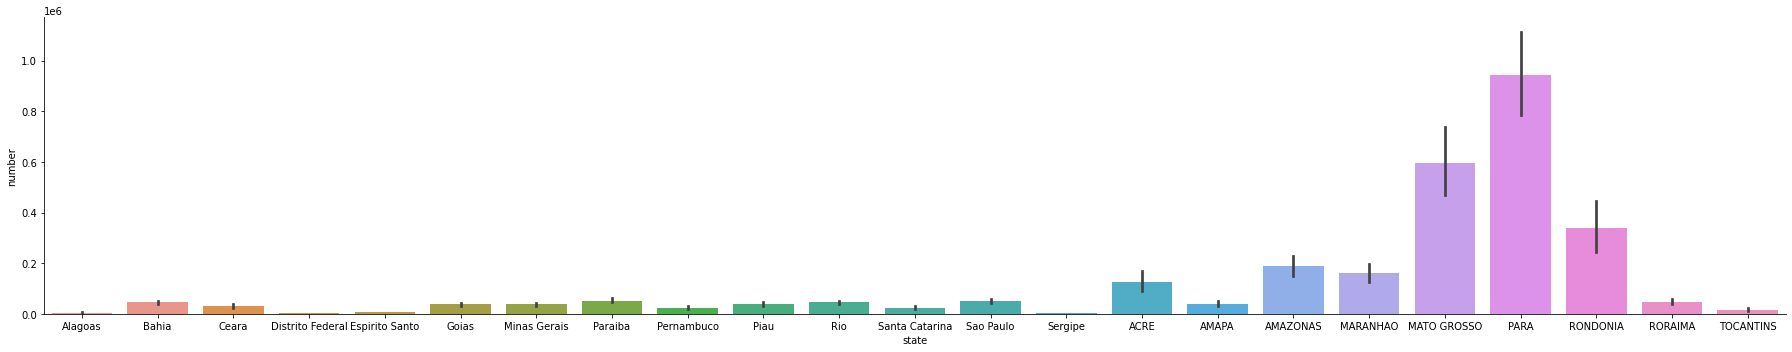

In [25]:
sns.catplot(x='state', y='number', kind='bar',data=generalforestfires[['state','number']], aspect=5, estimator=sum)

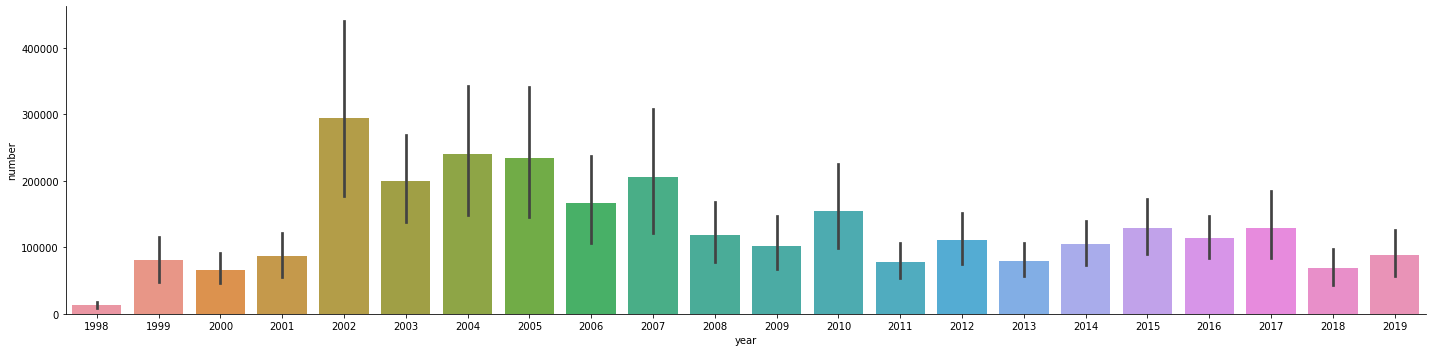

In [26]:
sns.catplot(data=generalforestfires[['year','number']],x='year', y='number', kind='bar', aspect=4, estimator=sum)

In [27]:
generalforestfires.corr()

,year,number
year,1.000000,-0.007926
number,-0.007926,1.000000


In [ ]:
#Machine Learning

In [28]:
dados_estados_binarios = pd.get_dummies(generalforestfires['state'])
dados_estados_binarios.head()

,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,MARANHAO,...,Paraiba,Pernambuco,Piau,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS
239,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:

vars_categoricas = ['state']

df2_generalforestfires = generalforestfires 

for i in vars_categoricas:
  dados_estados_binarios = pd.get_dummies(generalforestfires[i])
  df2_generalforestfires = df2_generalforestfires.drop(i,axis = 1)
  df2_generalforestfires=df2_generalforestfires.join(dados_estados_binarios)


df2_generalforestfires

,year,month,number,date,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,...,Paraiba,Pernambuco,Piau,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS
0,1999,7,1.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1999,8,67.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1999,9,212.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1999,10,63.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1999,11,4.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,2012,12,18.0,2012-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6211,2013,12,9.0,2013-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6212,2014,12,9.0,2014-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6213,2015,12,63.0,2015-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df2_generalforestfires = df2_generalforestfires.loc[df2['year']>=2000]

columns_df2 = ['year','number',  'ACRE', 'AMAPA', 'AMAZONAS',
       'Alagoas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo',
       'Goias', 'MARANHAO', 'MATO GROSSO', 'Minas Gerais', 'PARA', 'Paraiba',
       'Pernambuco', 'Piau', 'RONDONIA', 'RORAIMA', 'Rio', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'TOCANTINS']
df2_generalforestfires = df2_generalforestfires[columns_df2]

df2_generalforestfires = df2_generalforestfires.groupby(['year','number',  'ACRE', 'AMAPA', 'AMAZONAS',
       'Alagoas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo',
       'Goias', 'MARANHAO', 'MATO GROSSO', 'Minas Gerais', 'PARA', 'Paraiba',
       'Pernambuco', 'Piau', 'RONDONIA', 'RORAIMA', 'Rio', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'TOCANTINS']).sum().reset_index()

In [33]:
target = "number"

y = df2_generalforestfires[target]
X = df2_generalforestfires.drop([target],axis=1)

In [34]:
xTrain, xTest, yTrain, yTest = selection_variables_train_test(X,y)

In [36]:
cross_validation(X,y)

C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Linear Regression Média (R^2): 0.08245055174694425
Elastic Net Média (R^2): 0.012387493302405494
Ridge Média (R^2): 0.0843834540965076
Lasso Média (R^2): 0.07419062804915656
Neural (R^2): 0.02256421151683815


In [37]:

regr_linear = fit_model(LinearRegression(),xTrain,yTrain)

In [39]:
yPred = regr_linear.predict(xTest)
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [40]:
# TESTE : construindo o regressor com todas as variáveis disponíveis:








df_regressao_linear = create_dataframe(xTest,yPred,prediction_relative_error,yTest)
df_regressao_linear

,year,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS,prediction,relative_error,Focos de incêndio
6784,2017,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-8.117590,116.911647,48.0
5416,2014,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,658.754831,2764.151441,23.0
7227,2019,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,469.700124,2136.667259,21.0
3334,2009,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1416.738434,4470.123979,31.0
4479,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,92.299382,2207.484541,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,71.221511,1.745015,70.0
2912,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,134.455124,1580.689048,8.0
1137,2003,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,774.683122,6355.692687,12.0
2653,2007,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,596.167351,2029.169111,28.0


In [41]:
regr_linear.score(xTest, yTest)

0.08839574531371697

In [42]:
df_regressao_linear = df_regressao_linear.sort_values(['year'])
df_regressao_linear.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Regressão Linear')

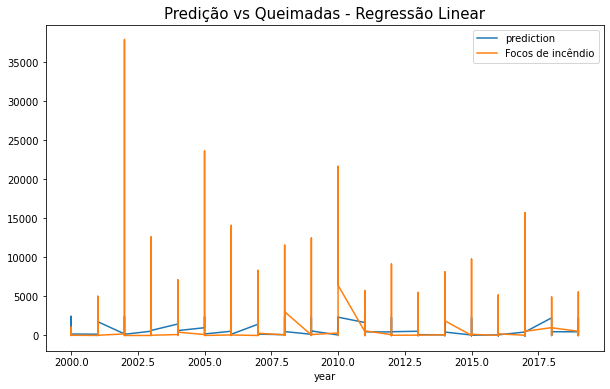

In [43]:
plot_graph(df_regressao_linear[['prediction','Focos de incêndio']],"Predição vs Queimadas - Regressão Linear")

In [44]:
xTrain_neural, xTest_neural, yTrain_neural, yTest_neural = selection_variables_train_test(X,y)
classifier_RN = fit_model(MLPRegressor(),xTrain_neural,yTrain_neural)
yPred_neural = classifier_RN.predict(xTest_neural)

In [45]:
prediction_relative_error_neural = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_neural,yTest_neural))]

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [46]:

df_rede_neural = create_dataframe(xTest_neural,yPred_neural,prediction_relative_error_neural,yTest_neural)
df_rede_neural

,year,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS,prediction,relative_error,Focos de incêndio
2800,2007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,573.368955,30.331840,823.0
2622,2007,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,570.417050,3702.780336,15.0
5236,2013,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,575.762209,5.612753,610.0
1910,2005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,570.163115,5601.631147,10.0
4861,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,578.058241,inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,574.628065,26.984998,787.0
606,2001,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,573.605074,38.913198,939.0
5569,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,572.514390,264.658847,157.0
968,2002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,573.890922,35.806385,894.0


In [47]:
classifier_RN.score(xTest_neural, yTest_neural)

0.00039931605897103317

In [48]:
df_rede_neural = df_rede_neural.sort_values(['year'])
df_rede_neural.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Rede Neural')

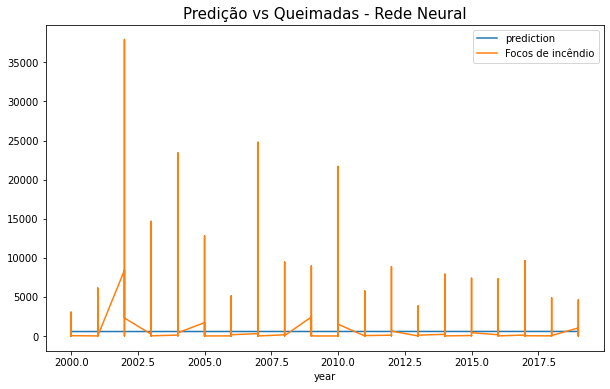

In [49]:
plot_graph(df_rede_neural[['prediction','Focos de incêndio']],"Predição vs Queimadas - Rede Neural")

In [50]:
##Elastic Net
xTrain_elastic, xTest_elastic, yTrain_elastic, yTest_elastic =  selection_variables_train_test(X,y)


In [51]:
classifier_EN = fit_model(ElasticNet(),xTrain_elastic,yTrain_elastic)
yPred_elastic = classifier_EN.predict(xTest_elastic)

In [52]:
prediction_relative_error_elastic = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_elastic,yTest_elastic))]

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [53]:


df_en = create_dataframe(xTest_elastic,yPred_elastic,prediction_relative_error_elastic,yTest_elastic)
df_en

,year,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS,prediction,relative_error,Focos de incêndio
2757,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,556.941267,117.555182,256.000
3431,2009,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,595.340471,351.015508,132.000
3782,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,544.936432,873.100771,56.000
1434,2003,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,683.033995,84.878592,4517.000
214,2000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,670.984125,1018.306876,60.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,578.956795,28847.839769,2.000
1293,2003,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,632.365988,276.408326,168.000
6187,2016,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,504.371263,37879.763815,1.328
1208,2003,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,640.528372,1425.067553,42.000


In [54]:
classifier_EN.score(xTest_elastic, yTest_elastic)

0.013721093884375923

In [55]:
df_en = df_en.sort_values(['year'])
df_en.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Elastic Net')

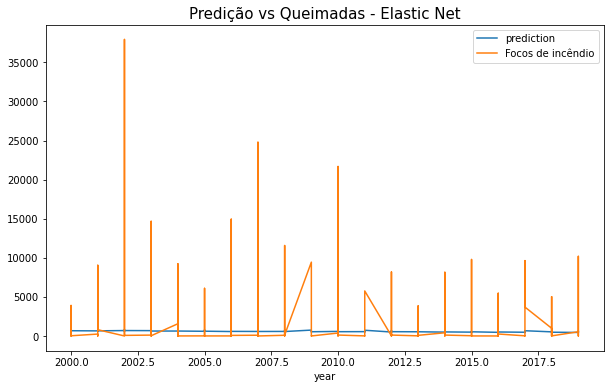

In [56]:
plot_graph(df_en[['prediction','Focos de incêndio']],"Predição vs Queimadas - Elastic Net")

In [57]:
#lASSO 
xTrain_lasso, xTest_lasso, yTrain_lasso, yTest_lasso =  selection_variables_train_test(X,y)


In [58]:
classifier_lasso = fit_model(Lasso(),xTrain_lasso,yTrain_lasso)


In [59]:
yPred_lasso = classifier_lasso.predict(xTest_lasso)

In [60]:
prediction_relative_error_lasso = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_lasso,yTest_lasso))]

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [61]:

df_lasso = create_dataframe(xTest_lasso,yPred_lasso,prediction_relative_error_lasso,yTest_lasso)
df_lasso

,year,ACRE,AMAPA,AMAZONAS,Alagoas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,RONDONIA,RORAIMA,Rio,Santa Catarina,Sao Paulo,Sergipe,TOCANTINS,prediction,relative_error,Focos de incêndio
5590,2014,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,692.169602,236.004661,206.000
1430,2003,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1266.655374,66.789319,3814.000
4042,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,236.017025,22019.683686,1.067
4505,2012,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,410.077078,5025.963473,8.000
95,2000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,525.836570,5742.628555,9.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2012,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,410.077078,1222.829283,31.000
4628,2012,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,922.936163,1519.186250,57.000
7138,2018,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,305.707607,35.231439,472.000
2117,2005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,154.879337,68.837156,497.000


In [62]:
classifier_lasso.score(xTest_lasso,yTest_lasso)

0.09362479554578618

In [63]:
df_lasso = df_lasso.sort_values(['year'])
df_lasso.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Lasso')

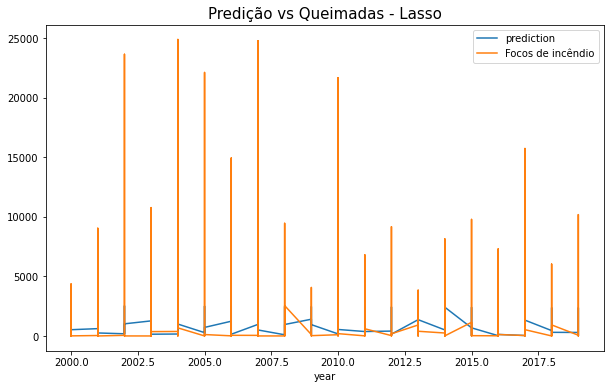

In [64]:
plot_graph(df_lasso[['prediction','Focos de incêndio']],"Predição vs Queimadas - Lasso")